# Decision Tree

In [2]:
import sklearn
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_fscore_support

import graphviz
import pandas as pd

In [3]:
## Load the  dataset
iris = load_iris()

In [4]:
type(iris.data)

numpy.ndarray

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [9]:
iris.target[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Shuffle data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = pd.DataFrame(iris.target)
print(df.shape)
df = sklearn.utils.shuffle(df)
print(df.head())

(150, 5)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                 5.7               4.4                1.5               0.4   
35                 5.0               3.2                1.2               0.2   
67                 5.8               2.7                4.1               1.0   
52                 6.9               3.1                4.9               1.5   
106                4.9               2.5                4.5               1.7   

     class  
15       0  
35       0  
67       1  
52       1  
106      2  


In [11]:
# features and target 
df_x = df.iloc[:, :4]
df_y = df.iloc[:, 4]

In [12]:
# Create DecisionTreeClassifier object
n_train = 100 # Split the targets into training/testing sets
clf = tree.DecisionTreeClassifier(criterion  = 'gini') # 'entropy'
clf = clf.fit(df_x[:n_train], df_y[:n_train])

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

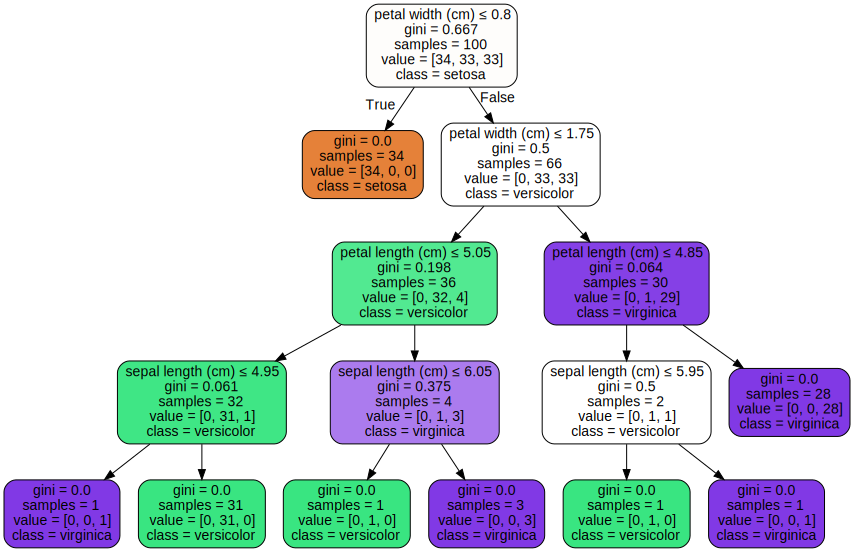

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [15]:
# prediction
test_record = [2., 2., 0.3, 10]
clf.predict([test_record])

array([1])

In [16]:
predicted_labels = clf.predict(df_x[n_train:])
predicted_labels

array([0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1,
       2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 1])

In [17]:
# model performance
accuracy_score(df_y[n_train:], predicted_labels, normalize=True, sample_weight=None)

0.96

In [18]:
precision_score(df_y[n_train:], predicted_labels, average='micro')

0.96

In [19]:
recall_score(df_y[n_train:], predicted_labels,  average='micro', sample_weight=None)

0.96

In [20]:
confusion_matrix(df_y[n_train:], predicted_labels, labels=None, sample_weight=None)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 16]], dtype=int64)

In [21]:
precision_recall_fscore_support(df_y[n_train:], predicted_labels, average='micro')

(0.96, 0.96, 0.96, None)

# KNN 

In [22]:
from sklearn.neighbors import NearestNeighbors
model  = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

# Support Vector Machines

In [23]:
from sklearn import svm
model = svm.SVC()

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

model =  GaussianNB()
model = BernoulliNB()
model = MultinomialNB()

# AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

# Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', fit_intercept=True )